# Clustering Countries Based On Their Potential To Become Co2 Neutral

In [2]:
import pandas as pd

In [3]:
global_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
ghg_emissions = pd.read_csv("CAIT Country GHG Emissions.csv", skiprows=2)

In [4]:
#help(pd.read_csv)

In [5]:
#importing visualization tool matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Country wide co2 emissions (Metric ton per capita) data from World Bank 
http://data.worldbank.org/indicator/EN.ATM.CO2E.PC

In [6]:

co2_emissions_wb = pd.read_csv("Co2Emissions_country.csv", skiprows=4)

In [7]:
co2_emissions_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 61 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              178 non-null float64
1961              179 non-null float64
1962              180 non-null float64
1963              181 non-null float64
1964              186 non-null float64
1965              186 non-null float64
1966              186 non-null float64
1967              186 non-null float64
1968              185 non-null float64
1969              186 non-null float64
1970              188 non-null float64
1971              189 non-null float64
1972              192 non-null float64
1973              192 non-null float64
1974              192 non-null float64
1975              192 non-null float64
1976              192 non-null float64
1977              192 non-null float64
1978              192 non-null float64
19

In [8]:
#removing null columns
co2_emissions_wb.drop('Unnamed: 60', 1, inplace=True)
co2_emissions_wb.drop('2012', 1, inplace=True)
co2_emissions_wb.drop('2013', 1, inplace=True)
co2_emissions_wb.drop('2014', 1, inplace=True)
co2_emissions_wb.drop('2015', 1, inplace=True)

In [9]:
co2_emissions_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 56 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              178 non-null float64
1961              179 non-null float64
1962              180 non-null float64
1963              181 non-null float64
1964              186 non-null float64
1965              186 non-null float64
1966              186 non-null float64
1967              186 non-null float64
1968              185 non-null float64
1969              186 non-null float64
1970              188 non-null float64
1971              189 non-null float64
1972              192 non-null float64
1973              192 non-null float64
1974              192 non-null float64
1975              192 non-null float64
1976              192 non-null float64
1977              192 non-null float64
1978              192 non-null float64
19

In [10]:
#togo_co2 = co2_emissions_wb[co2_emissions_wb['Country Name'] == 'Togo']
#print togo_co2
#type(togo_co2)
country_wise_co2 = pd.melt(co2_emissions_wb,id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Co2_emissions')
country_wise_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
1,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046068
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.104357
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.258195


In [11]:
#dropping null values
country_wise_co2.dropna(inplace=True)
country_wise_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046068
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.104357
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.258195
5,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
6,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.118786


In [12]:
# Extracting Bhutan's co2 emissions history

bhutan_co2 = country_wise_co2[country_wise_co2['Country Name'] == 'Bhutan']
bhutan_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
2510,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1970,0.012582
2758,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1971,0.012156
3006,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1972,0.011726
3254,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1973,0.011302
3502,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1974,0.010892


In [13]:
# Extracting USA's Co2 emissions

usa_co2 = country_wise_co2[country_wise_co2['Country Name'] == 'United States']
usa_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
233,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
481,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
729,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
977,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
1225,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


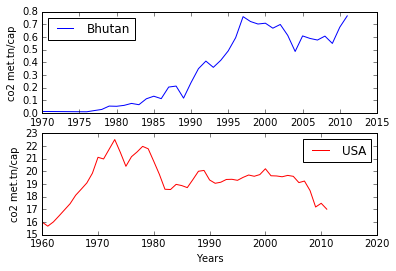

In [14]:
# Plotting Bhutan's co2 emissions over time
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(bhutan_co2['Year'], bhutan_co2['Co2_emissions'], label = "Bhutan")
ax.legend(loc="upper left")
#ax.set_title("Bhutan C02 Emissions")
#ax.set_xlabel("Years")
ax.set_ylabel("co2 met.tn/cap")
# Plotting USA's co2 emissions over time
ax = fig.add_subplot(212)
ax.plot(usa_co2['Year'], usa_co2['Co2_emissions'], color = "Red", label = "USA")
#ax.set_title("USA C02 Emissions")
ax.set_xlabel("Years")
ax.set_ylabel("co2 met.tn/cap")
ax.legend()

In [15]:
fig.savefig("individual_co2_emissions.png")

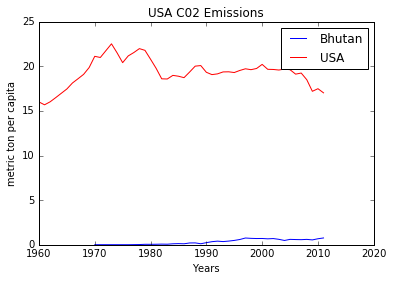

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bhutan_co2['Year'], bhutan_co2['Co2_emissions'], label="Bhutan")
#ax.set_title("Bhutan C02 Emissions")
#ax.set_xlabel("Years")
#ax.set_ylabel("metric ton per capita")
# Plotting USA's co2 emissions over time
ax = fig.add_subplot(111)
ax.plot(usa_co2['Year'], usa_co2['Co2_emissions'], color = "Red", label="USA")
ax.set_title("USA C02 Emissions")
ax.set_xlabel("Years")
ax.set_ylabel("metric ton per capita")
ax.legend()

In [17]:
fig.savefig('samescale_co2emissions.png')

## Country wide percentage of forest area data from World Bank 
http://data.worldbank.org/indicator/AG.LND.FRST.ZS

In [18]:
forest_cover = pd.read_csv("Country_wise_forest_area_percentage.csv", skiprows=4)
forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 61 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

In [19]:
# Dropping null columns

forest_cover.drop(forest_cover.columns[range(4,34)], 1, inplace=True)
forest_cover.drop(['2014', 'Unnamed: 60'], 1, inplace=True)
forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 29 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1990              235 non-null float64
1991              209 non-null float64
1992              232 non-null float64
1993              235 non-null float64
1994              235 non-null float64
1995              235 non-null float64
1996              235 non-null float64
1997              235 non-null float64
1998              235 non-null float64
1999              235 non-null float64
2000              241 non-null float64
2001              237 non-null float64
2002              237 non-null float64
2003              237 non-null float64
2004              237 non-null float64
2005              241 non-null float64
2006              239 non-null float64
2007              239 non-null float64
2008              239 non-null float64
20

In [20]:
# modifying the frame: folding year value into a column 

forest_cover = pd.melt(forest_cover, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='ForestCoverPercent')
forest_cover.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,ForestCoverPercent
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,1990,0.000000
1,Andorra,AND,Forest area (% of land area),AG.LND.FRST.ZS,1990,34.042553
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,1990,2.067825
3,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,1990,48.909922
4,Albania,ALB,Forest area (% of land area),AG.LND.FRST.ZS,1990,28.795620


In [21]:
#drop na values

forest_cover.dropna(inplace = True)
forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 6199
Data columns (total 6 columns):
Country Name          5901 non-null object
Country Code          5901 non-null object
Indicator Name        5901 non-null object
Indicator Code        5901 non-null object
Year                  5901 non-null object
ForestCoverPercent    5901 non-null float64
dtypes: float64(1), object(5)
memory usage: 322.7+ KB


### Variable Names
1. forest_cover: % of forest cover by country and year
2. usa_forest_cover: % of forest cover by year for USA
3. country_wise_co2: Country wide yearly co2 emissions
4. usa_co2: USA's co2 emissions by the year.

In [22]:
# Extracting Bhutan's forest % distribution

bhutan_forest_cover = forest_cover[forest_cover['Country Name'] == 'Bhutan']
bhutan_forest_cover.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,ForestCoverPercent
30,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1990,53.656657
278,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1991,53.862980
526,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1992,54.075509
774,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1993,54.288038
1022,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1994,63.980653


In [23]:
# Extracting USA's forest cover percentage

usa_forest_cover = forest_cover[forest_cover['Country Name'] == 'United States']
usa_forest_cover.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,ForestCoverPercent
233,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1990,33.022308
481,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1991,33.034165
729,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1992,33.046023
977,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1993,33.057880
1225,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1994,33.069737


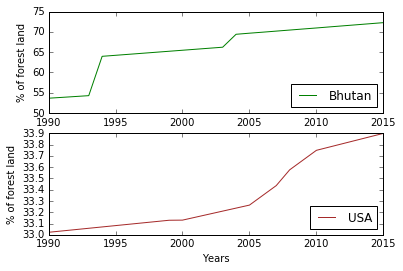

In [24]:
# Plotting distribution of Bhutan's forest cover

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(bhutan_forest_cover['Year'], bhutan_forest_cover['ForestCoverPercent'], color = "Green", label="Bhutan")
ax.legend(loc="lower right")
#ax.set_title("Bhutan's Forest Cover")
#ax.set_xlabel("Year")
ax.set_ylabel("% of forest land")
# Plotting distribution of USA's forest cover
ax = fig.add_subplot(212)
ax.plot(usa_forest_cover['Year'], usa_forest_cover['ForestCoverPercent'], color = "Brown", label="USA")
ax.legend(loc="lower right")
#ax.set_title("USA's Forest Cover")
ax.set_xlabel("Years")
ax.set_ylabel("% of forest land")

In [25]:
fig.savefig("individual_forest_cover.png")

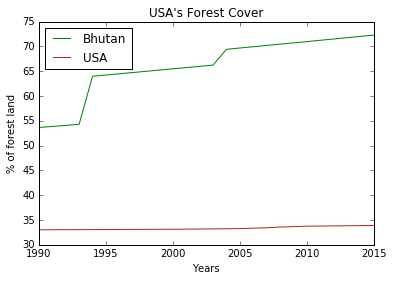

In [26]:
# Plotting distribution of Bhutan's and USA's forest cover under the same scale

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bhutan_forest_cover['Year'], bhutan_forest_cover['ForestCoverPercent'], color = "Green", label="Bhutan")
#ax.set_title("Bhutan's Forest Cover")
#ax.set_xlabel("Year")
ax.set_ylabel("% of forest land")
# Plotting distribution of USA's forest cover

ax = fig.add_subplot(111)
ax.plot(usa_forest_cover['Year'], usa_forest_cover['ForestCoverPercent'], color = "Brown", label="USA")
ax.set_title("USA's Forest Cover")
ax.set_xlabel("Years")
ax.set_ylabel("% of forest land")
ax.legend(loc="upper left")

In [27]:
fig.savefig("samescale_forest_cover.png")

### Predicting USA Carbon Neutral Score. Combine Forest Cover and Co2 Emissions
1. usa_forest_cover and usa_co2 based on year
2. Add usa_temperature data
3. Scale the features using min-max normalization
3. Option 1: Use these three to identify correlation
4. Option 2: Use global yearly average as third feature.
    - use co2, forest cover and global temperature to predict either average usa temprature or rate of increase of temperature
    - You may also use global ocean temperature to see if that has correlation to temperature change.

# Global Surface Temperature country wise

In [28]:
# Reading the file
global_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [29]:
#reading global surface land temperature
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [30]:
# dropping NaN values
global_monthly_temp = global_temp.dropna()
global_monthly_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [34]:
#converting string date to date format
global_monthly_temp['dt'] = pd.to_datetime(global_monthly_temp['dt'], format="%Y-%m-%d")
print type(global_monthly_temp['dt'])
global_monthly_temp.head(10)

<class 'pandas.core.series.Series'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01 00:00:00,4.384,2.294,Åland
5,1744-04-01 00:00:00,1.530,4.680,Åland
6,1744-05-01 00:00:00,6.702,1.789,Åland
7,1744-06-01 00:00:00,11.609,1.577,Åland
8,1744-07-01 00:00:00,15.342,1.410,Åland
10,1744-09-01 00:00:00,11.702,1.517,Åland
11,1744-10-01 00:00:00,5.477,1.862,Åland
12,1744-11-01 00:00:00,3.407,1.425,Åland
13,1744-12-01 00:00:00,-2.181,1.641,Åland
14,1745-01-01 00:00:00,-3.850,1.841,Åland


In [6]:
#[x.date() for x in global_monthly_temp['dt']]
global_monthly_temp.loc[:, 'Year'] = [x.year for x in global_monthly_temp['dt']]

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
global_monthly_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01 00:00:00,4.384,2.294,Åland,1743
5,1744-04-01 00:00:00,1.530,4.680,Åland,1744
6,1744-05-01 00:00:00,6.702,1.789,Åland,1744
7,1744-06-01 00:00:00,11.609,1.577,Åland,1744
8,1744-07-01 00:00:00,15.342,1.410,Åland,1744


In [8]:
# Extracting United States's historical temperature change data
bhutan_temp = global_monthly_temp[global_monthly_temp['Country' ] == 'United States']
bhutan_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
554880,1768-09-01 00:00:00,15.420,2.880,United States,1768
554881,1768-10-01 00:00:00,8.162,3.386,United States,1768
554882,1768-11-01 00:00:00,1.591,3.783,United States,1768
554883,1768-12-01 00:00:00,-2.882,4.979,United States,1768
554884,1769-01-01 00:00:00,-3.952,4.856,United States,1769


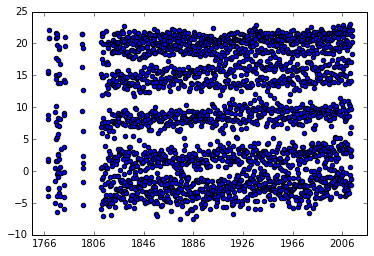

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(bhutan_temp['dt'], bhutan_temp['AverageTemperature'])
#ax.scatter(list(bhutan_temp['dt']), list(bhutan_temp['AverageTemperature']))
#ax.hist(bhutan_temp['dt'], bhutan_temp['AverageTemperature'])
plt.scatter(list(bhutan_temp['dt']), list(bhutan_temp['AverageTemperature']))

Take mean of the temperatures to see trending